# **Homework 2-Steam Reviews 2021**
## **Research Questions**

### [RQ1] Exploratory data analysis


### [RQ2]

In [ ]:
!pip3 install --upgrade pip
!pip install kaggle

In [ ]:
!kaggle datasets download -d najzeko/steam-reviews-2021

In [ ]:
!unzip steam-reviews-2021.zip

In [ ]:
!pip3 install matplotlib

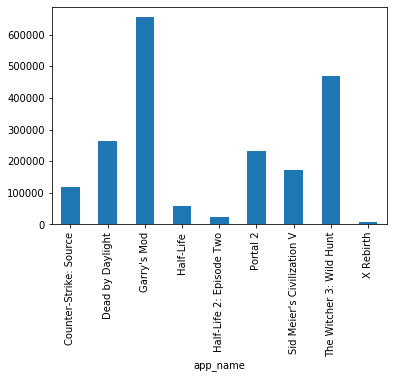

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
dataset = pd.read_csv('./steam_reviews.csv', header='infer', nrows=2000000)
dataset.groupby('app_name').review.count().plot.bar()
#I grouped by "app_name", selected review column, count the rewivew for the single app and eventually plot them 

In [15]:
maxScore = dataset.groupby('app_name').weighted_vote_score.mean()
topTen = maxScore.sort_values(ascending=False)
for i in range(5):
    print(topTen.index[i] , format(topTen[i],'.5f'))
#through weighted_vote_score I've done the mean. In the end I showed the 5 with the highest rating because the request 

X Rebirth 0.38045
Counter-Strike: Source 0.18269
Half-Life 2: Episode Two 0.17264
Half-Life 0.16240
Dead by Daylight 0.16131


In [34]:
#I grouped by "app_name", I've select just the column with recommended equal to true, selected recommended column, count 
min = dataset[dataset['recommended'] == True].groupby('app_name').recommended.count()
max = dataset[dataset['recommended'] == True].groupby('app_name').recommended.count()
print("the application with more recommendations is: ", df.idxmax(), "whit",df.loc[df.idxmax()])
print("the application with fewer recommendations is: ", df.idxmin(), "whit",df.loc[df.idxmin()])

the application with more recommendations is:  The Witcher 3: Wild Hunt whit 468691
the application with fewer recommendations is:  X Rebirth whit 7001


In [104]:
purchase = dataset[dataset['steam_purchase'] == True].groupby('app_name').steam_purchase.value_counts()
purchase_free = dataset[dataset['received_for_free'] == True].groupby('app_name').received_for_free.value_counts()
print("List of those that have been purchased")
for i in range(len(purchase)):
    print(purchase.index[i][0], ":", purchase[i])
print("\nList of those that have been received for free")
for i in range(len(purchase)):
    print(purchase_free.index[i][0], ":", purchase_free[i])


List of those that have been purchased
Counter-Strike: Source : 74817
Garry's Mod : 81956
Half-Life : 43875
Half-Life 2: Episode Two : 17538
Portal 2 : 182952
The Witcher 3: Wild Hunt : 429409
X Rebirth : 4934

List of those that have been received for free
Counter-Strike: Source : 5082
Garry's Mod : 4626
Half-Life : 2799
Half-Life 2: Episode Two : 897
Portal 2 : 5779
The Witcher 3: Wild Hunt : 5748
X Rebirth : 35


### [RQ3]

In [122]:
import pandas as pd

In [123]:
# We will use the parser seen during lectures 
def dateparse(time_in_secs):
    return pd.to_datetime(time_in_secs, unit='s')

In [124]:
steam_small = pd.read_csv('C:/Users/Filippo/Desktop/università/ADM/steam_reviews.csv',header='infer',parse_dates=['timestamp_created','timestamp_updated', 'author.last_played'],date_parser=dateparse)

In [125]:
# With a simple query we isolate the feature we need, excluding the date part and with value_counts() we group the creation variable
creation = steam_small.timestamp_created.dt.time
print("most common time of writing:",creation.value_counts().index[0],"\nnumber of occurrences:", creation.value_counts()[0])

most common time of writing: 15:54:53 
number of occurrences: 583


In [126]:
def rev_counts(time_intervals):
    # First we ccreate the variable of interest
    hours = steam_small.timestamp_created.dt.hour
    # Then a long procedure to engineer the input: parse, extract hours and sort. At last we append 24 to include reviews written between 8 pm and 12 pm
    time_intervals = pd.Series(time_intervals)
    time_intervals = pd.to_datetime(time_intervals,infer_datetime_format=True)
    time_intervals = time_intervals.dt.hour
    time_intervals = sorted(time_intervals)
    time_intervals.append(24)
    # We then bin the variable of interest with the newly created bins, group the results and plot 
    bins = pd.cut(hours,time_intervals)
    return bins.value_counts(sort=False).plot(kind='bar',title='Number of reviews by time interval',colormap='plasma',grid=True,rot=45)
    

<AxesSubplot:title={'center':'Number of reviews by time interval'}>

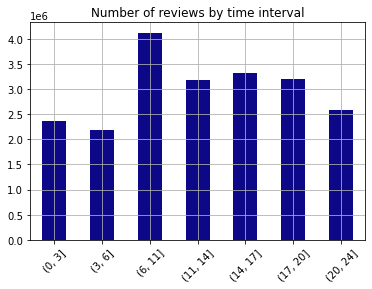

In [127]:
times = ['06:00:00','11:00:00','14:00:00','17:00:00','20:00:00','00:00:00','03:00:00']
rev_counts(times)

### [RQ4]

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('steam_reviews.csv', header='infer', nrows=1000000)

In [3]:
top_language_n = 3
top_language = dataset.loc[:,'language'].value_counts()\
[:top_language_n].sort_values(ascending=False)
print(*top_language.index.array)

english russian schinese


In [4]:
def language_fillter(dataset, languages):
    cmlg = pd.DataFrame(columns=dataset.columns.values) 
    for lg in languages:
        cmlg = cmlg.append(dataset[dataset.language == lg])
    return cmlg
        

In [5]:
tr = language_fillter(dataset, top_language.index.array)
result = tr[tr.votes_funny > 0]
print((len(result)/len(tr))*100)

9.688186971294103


In [6]:
result = tr[tr.votes_helpful > 0]
print((len(result)/len(tr))*100)

26.138125370351688


### [RQ5]

In [ ]:
import pandas as pd
dataset = pd.read_csv('./steam_reviews.csv', header='infer', nrows=100000)
dataset.groupby('author.steamid')["author.num_reviews"].plot.bar()

### [RQ6]